In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#customer_id = it shows the the unique id of custerm
#credit_score = its shows the credis score of customer
#country = the country column shows the where from the customer is
#gender = 
#age = 
#tenure = The number of years the customer has been with the company
#balance = it shows the how much money is in the customers account
# product_number = The number of products the customer holds with the bank
#credit_card = it shows the how many customer have card
#active_member = it shwos wether customer is active or nat
#estimated_salary = The estimated yearly salary of the customer
#churn = its shows whether the customer has churned 

In [9]:
df.shape

(10000, 12)

In [38]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
zero_balance = df[df['balance']==0]
len(zero_balance)

3617

In [16]:
zero_balance['churn'].value_counts()/len(zero_balance)


churn
0    0.861764
1    0.138236
Name: count, dtype: float64

In [39]:
df["gender"].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [11]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


C:\Users\adity\AppData\Local\Temp\ipykernel_15588\3864750597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')


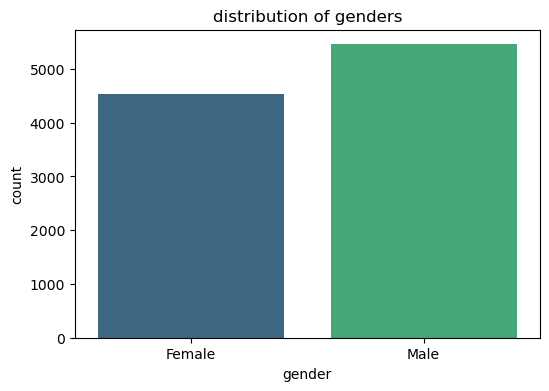

In [46]:
#UNIVERIATE ANALYASIS 
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('distribution of gender')
plt.show()

In [7]:
categorical_features = ['country', 'products_number', 'credit_card', 'active_member', 'churn']
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\2381109621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


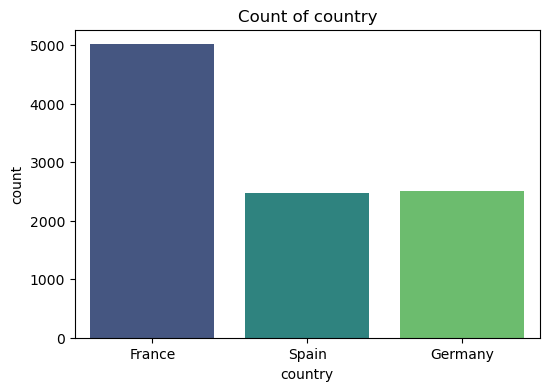

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\2381109621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


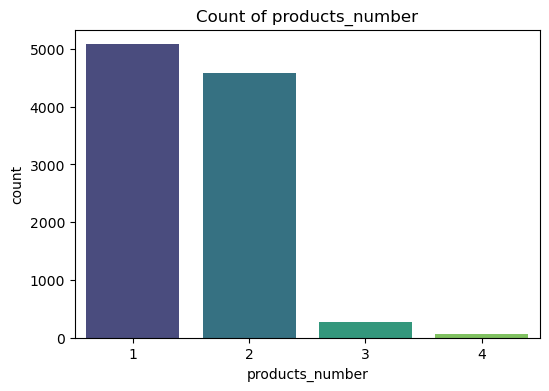

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\2381109621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


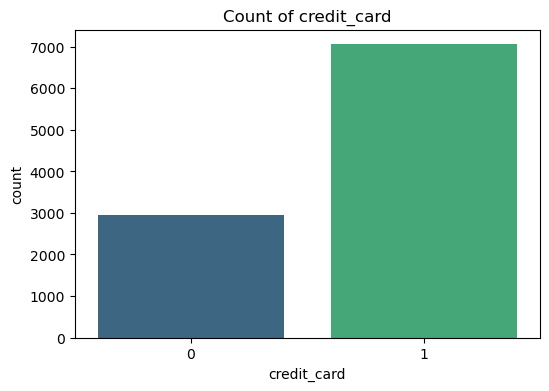

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\2381109621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


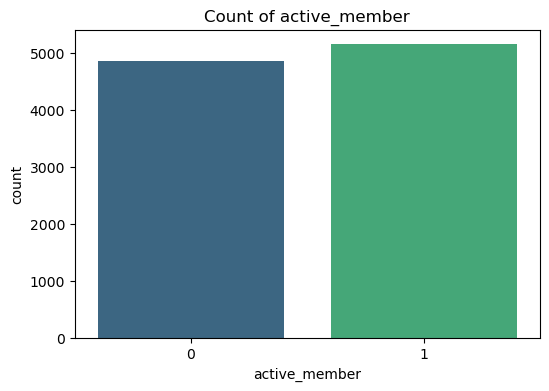

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\2381109621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


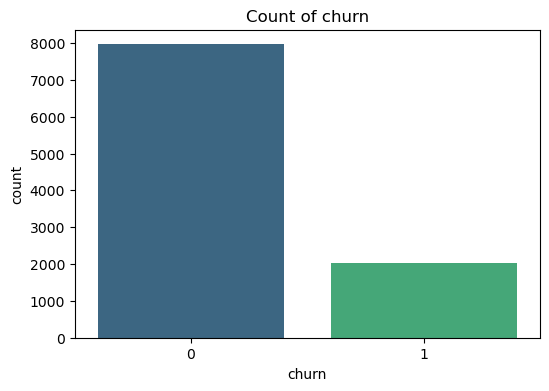

In [47]:
# Categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Count of {feature}')
    plt.show()

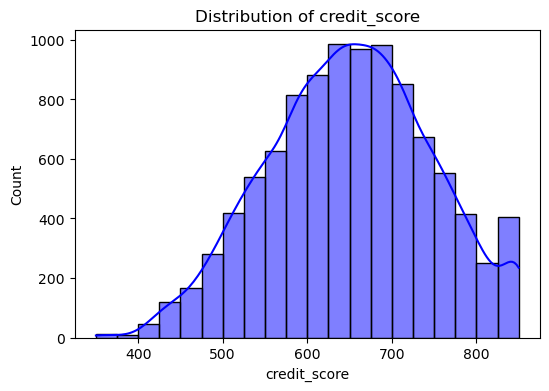

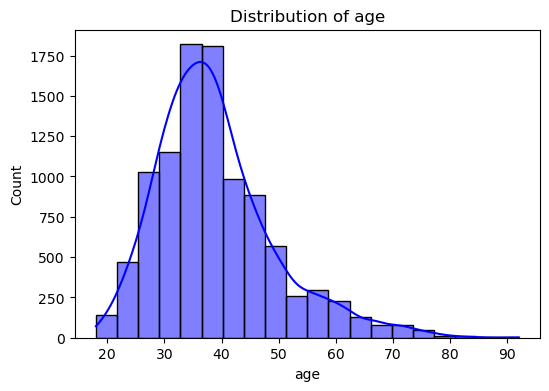

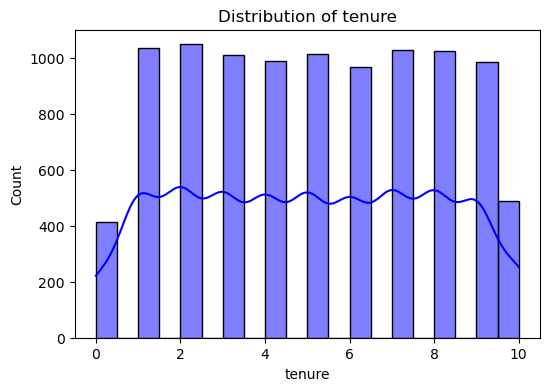

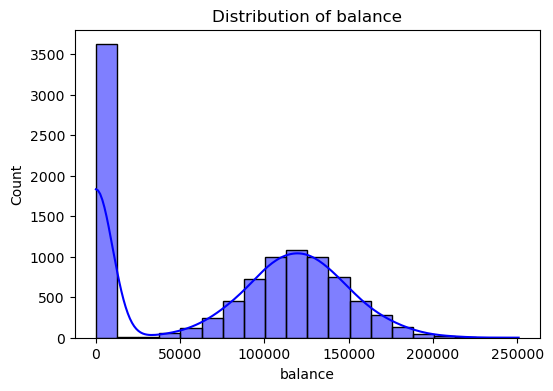

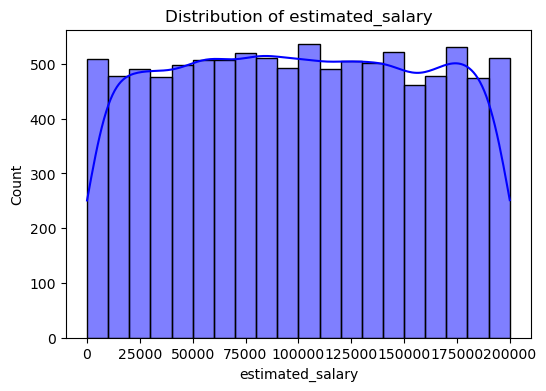

In [7]:
#NUIVERIATE ANALYASIS 
# Numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\3908754281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df, palette='coolwarm')


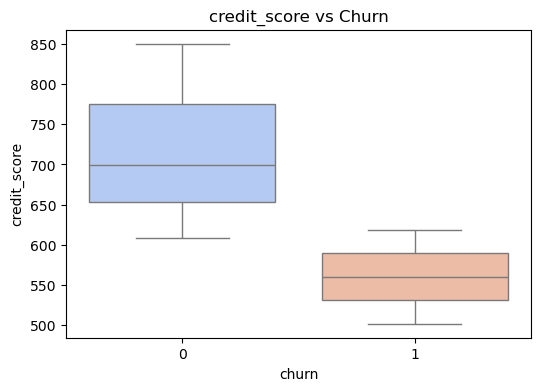

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\3908754281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df, palette='coolwarm')


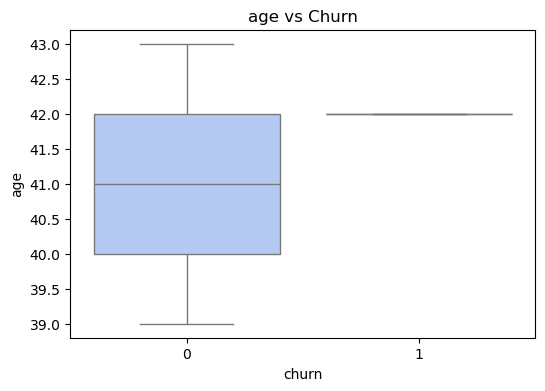

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\3908754281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df, palette='coolwarm')


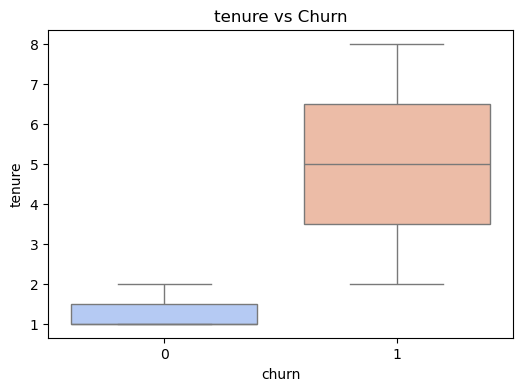

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\3908754281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df, palette='coolwarm')


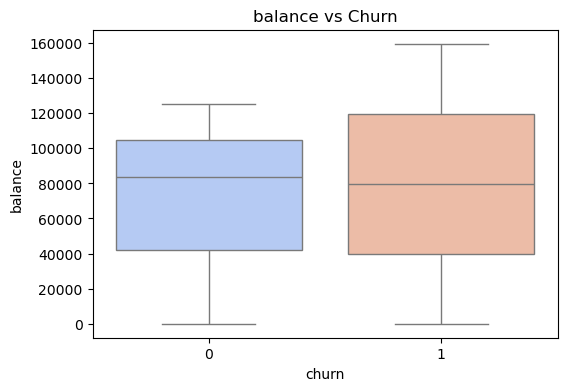

C:\Users\adity\AppData\Local\Temp\ipykernel_15588\3908754281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df, palette='coolwarm')


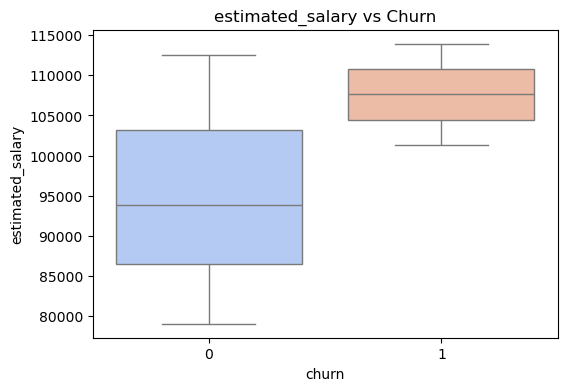

In [32]:
#BIVERIATE ANALYASIS 
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} vs Churn')
    plt.show()

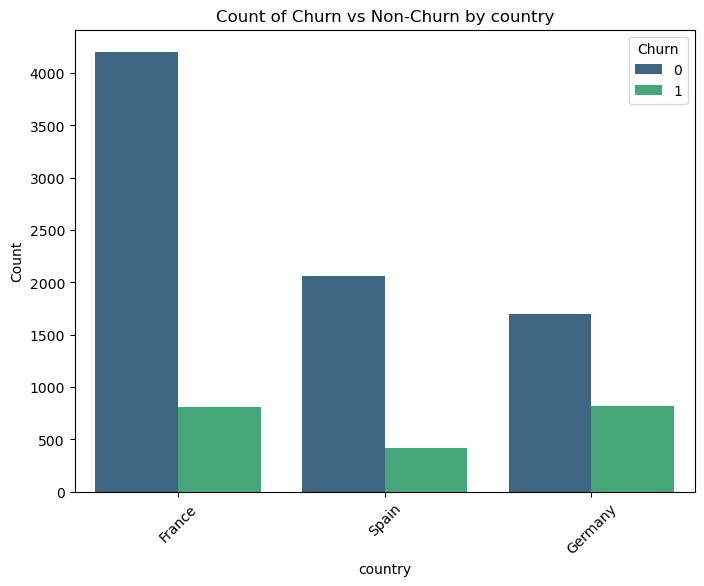

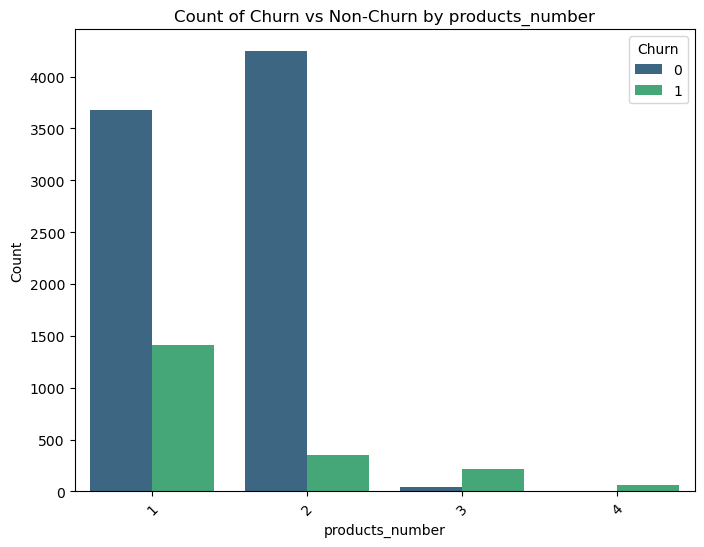

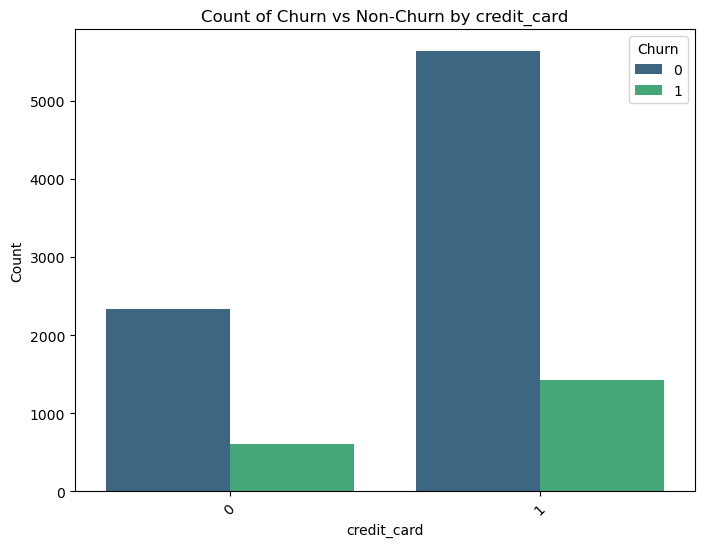

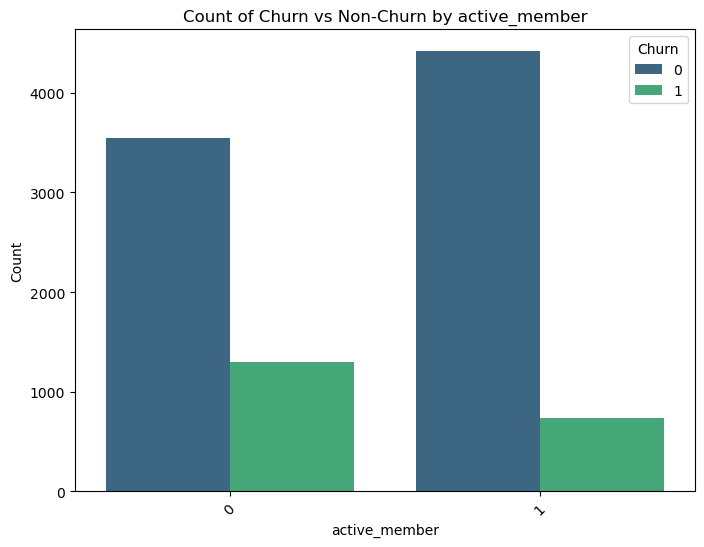

In [25]:
for feature in categorical_features:
    if feature != 'churn':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, hue='churn', data=df, palette='viridis')
        plt.title(f'Count of Churn vs Non-Churn by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Churn', loc='upper right')
        plt.xticks(rotation=45)
        plt.show()

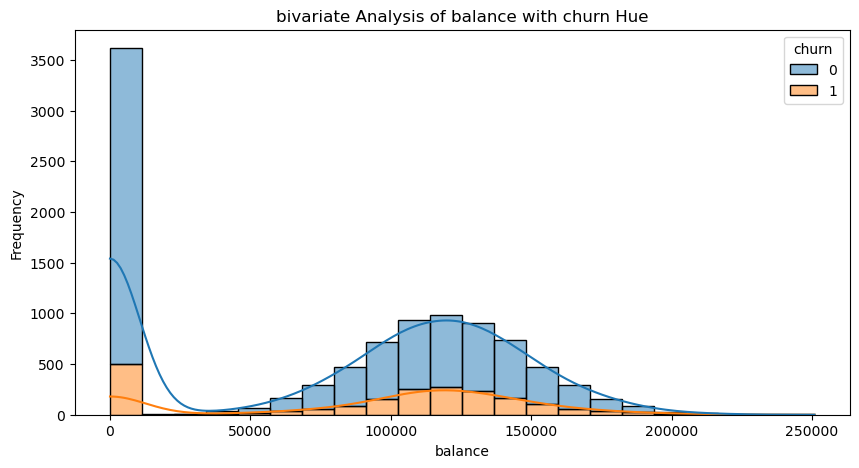

In [8]:
'''biverint analysis using hue'''

plt.figure(figsize=(10, 5))
sns.histplot(data = df, x='balance', hue='churn', multiple='stack', kde=True)
plt.title('bivariate Analysis of balance with churn Hue')
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.show()

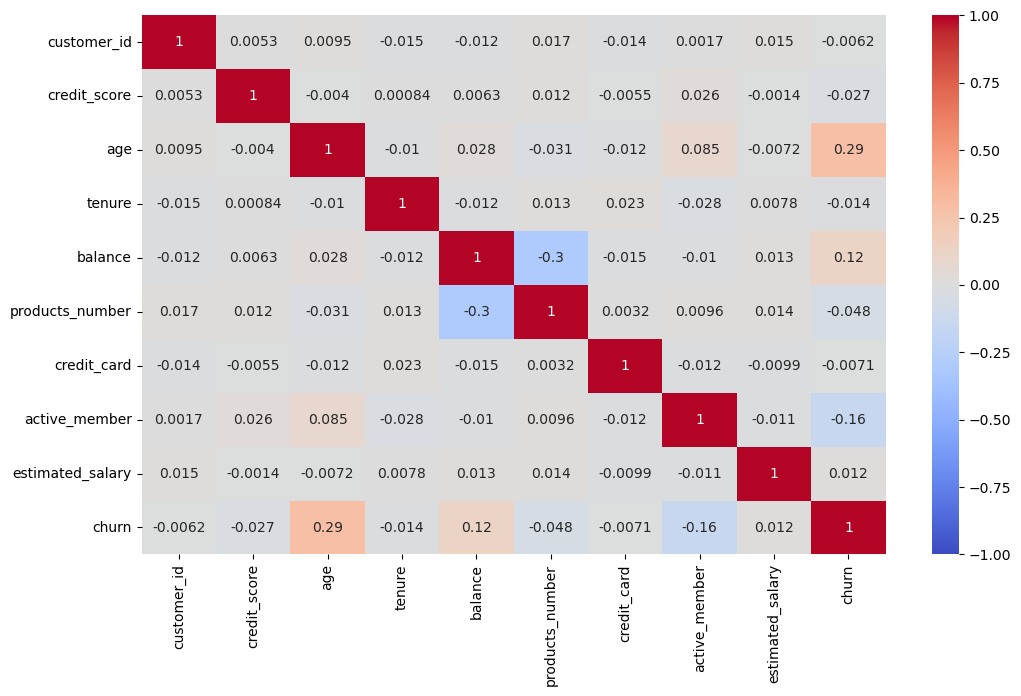

In [28]:
f = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 7))
sns.heatmap(f.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [21]:
f.corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.960204,-0.030498,-0.519680,-0.053385,-0.361124,-0.114446,0.142360,-0.924891,-0.754433
credit_score,0.960204,1.000000,0.142535,-0.601372,-0.109675,-0.570261,0.014826,0.389014,-0.956468,-0.671419
age,-0.030498,0.142535,1.000000,0.357681,0.597995,-0.221163,0.842701,0.541736,-0.166042,0.361158
tenure,-0.519680,-0.601372,0.357681,1.000000,0.676636,0.814955,0.557086,-0.526137,0.451261,0.680883
balance,-0.053385,-0.109675,0.597995,0.676636,1.000000,0.377437,0.401427,-0.075957,0.142777,0.075957
products_number,-0.361124,-0.570261,-0.221163,0.814955,0.377437,1.000000,0.102062,-0.918559,0.412643,0.408248
credit_card,-0.114446,0.014826,0.842701,0.557086,0.401427,0.102062,1.000000,0.166667,-0.192667,0.666667
active_member,0.142360,0.389014,0.541736,-0.526137,-0.075957,-0.918559,0.166667,1.000000,-0.236713,-0.166667
estimated_salary,-0.924891,-0.956468,-0.166042,0.451261,0.142777,0.412643,-0.192667,-0.236713,1.000000,0.475251
churn,-0.754433,-0.671419,0.361158,0.680883,0.075957,0.408248,0.666667,-0.166667,0.475251,1.000000


In [29]:
f.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0


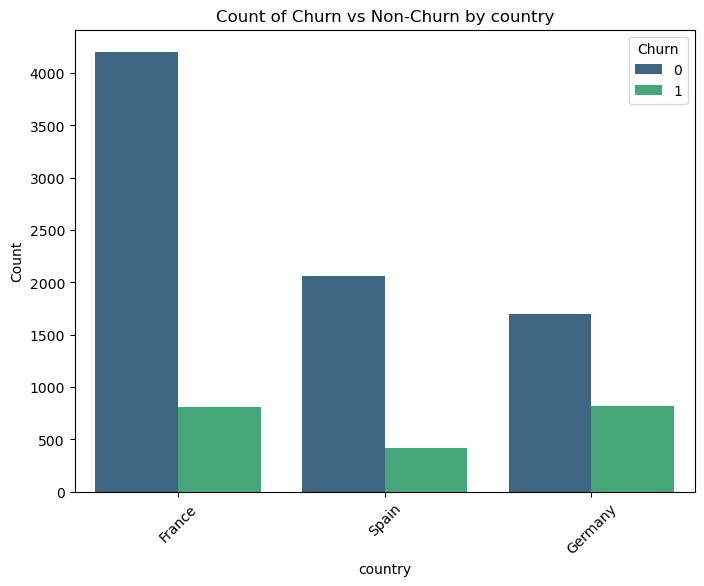

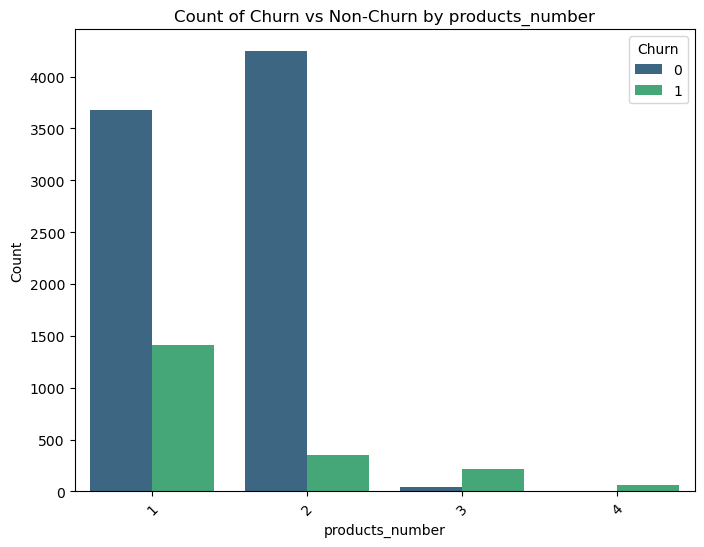

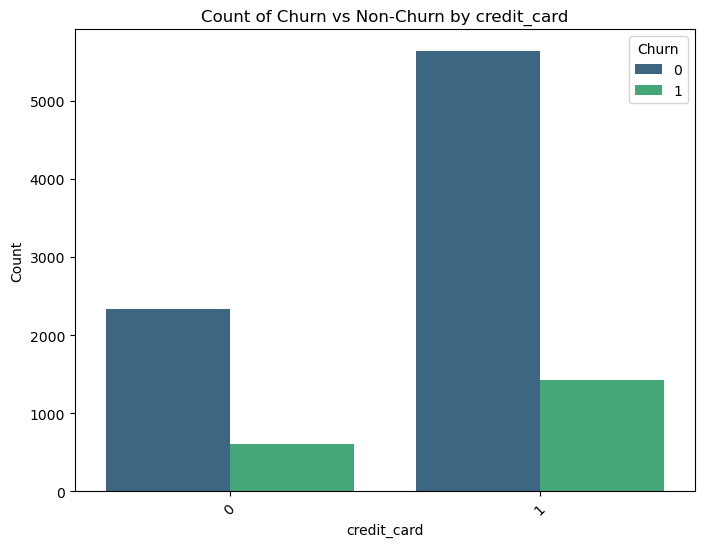

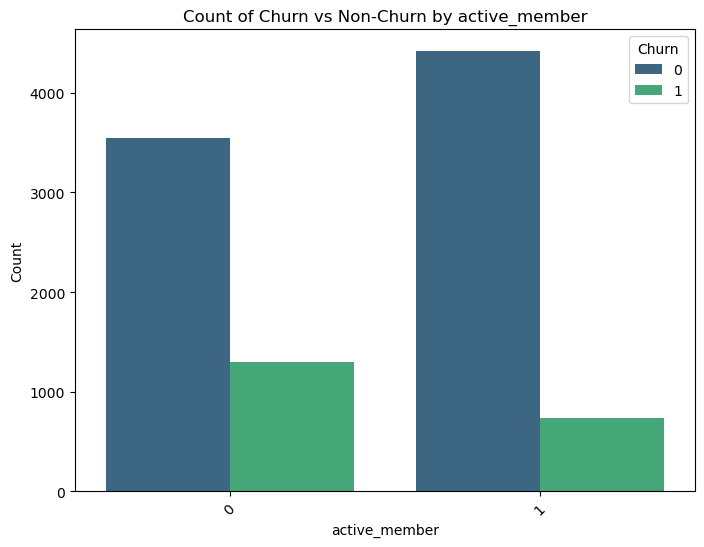

In [24]:
for feature in categorical_features:
    if feature != 'churn':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, hue='churn', data=df, palette='viridis')
        plt.title(f'Count of Churn vs Non-Churn by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Churn', loc='upper right')
        plt.xticks(rotation=45)
        plt.show()


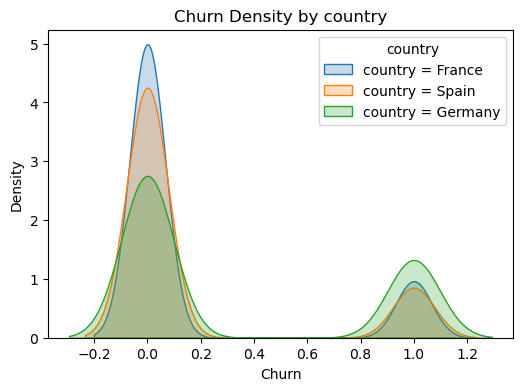

C:\Users\adity\AppData\Local\Temp\ipykernel_22512\2727967061.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset['churn'], label=f'{feature} = {category}', fill=True)


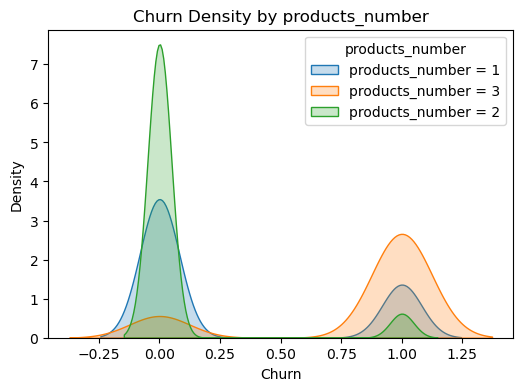

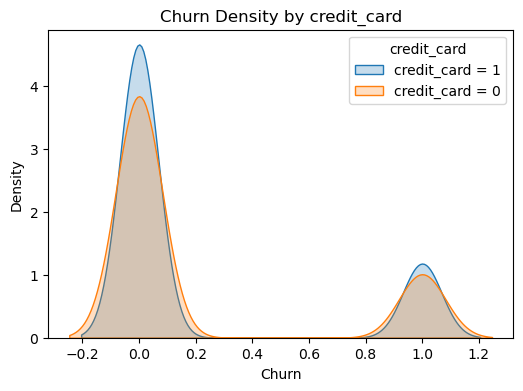

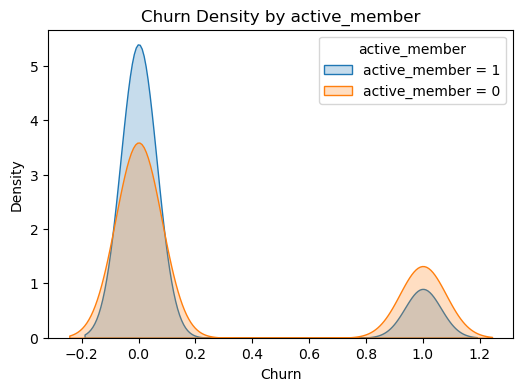

In [23]:
for feature in categorical_features:
    if feature != 'churn':
        plt.figure(figsize=(6, 4))
        for category in df[feature].unique():
            subset = df[df[feature] == category]
            sns.kdeplot(subset['churn'], label=f'{feature} = {category}', fill=True)
        plt.title(f'Churn Density by {feature}')
        plt.xlabel('Churn')
        plt.ylabel('Density')
        plt.legend(title=feature)
        plt.show()
